<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Alex-Lew's-first-model" data-toc-modified-id="Alex-Lew's-first-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Alex Lew's first model</a></span><ul class="toc-item"><li><span><a href="#Probability-tree-of-model" data-toc-modified-id="Probability-tree-of-model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Probability tree of model</a></span></li><li><span><a href="#Intervention-at-$L=1$" data-toc-modified-id="Intervention-at-$L=1$-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Intervention at $L=1$</a></span></li></ul></li><li><span><a href="#Alex's-second-model" data-toc-modified-id="Alex's-second-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Alex's second model</a></span><ul class="toc-item"><li><span><a href="#Probability-tree-of-second-model" data-toc-modified-id="Probability-tree-of-second-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Probability tree of second model</a></span></li><li><span><a href="#Intervention-of-$L=1$-on-second-model" data-toc-modified-id="Intervention-of-$L=1$-on-second-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Intervention of $L=1$ on second model</a></span></li></ul></li><li><span><a href="#James-Koppel's-example-1" data-toc-modified-id="James-Koppel's-example-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>James Koppel's example 1</a></span></li><li><span><a href="#Example-involving-conditioning-and-counterfactual-on-a-graph-with-dynamic-dependencies-and-interesting-conditioning-dependencies" data-toc-modified-id="Example-involving-conditioning-and-counterfactual-on-a-graph-with-dynamic-dependencies-and-interesting-conditioning-dependencies-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Example involving conditioning and counterfactual on a graph with dynamic dependencies and interesting conditioning dependencies</a></span><ul class="toc-item"><li><span><a href="#Factual-world-Probability-Tree-mechanism-for-$Z=0$" data-toc-modified-id="Factual-world-Probability-Tree-mechanism-for-$Z=0$-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Factual world Probability Tree mechanism for $Z=0$</a></span></li><li><span><a href="#Conditioned-on-$Z=0$" data-toc-modified-id="Conditioned-on-$Z=0$-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Conditioned on $Z=0$</a></span></li><li><span><a href="#Intervene-on-$Z=1$" data-toc-modified-id="Intervene-on-$Z=1$-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Intervene on $Z=1$</a></span></li><li><span><a href="#Counterfactual" data-toc-modified-id="Counterfactual-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Counterfactual</a></span></li></ul></li></ul></div>

In [33]:

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from probability_trees import MinCut, Critical, PTree
from IPython.display import Latex

# Alex Lew's first model


Say  $x_i$ is $1$ if there is an item present at position $i$ in the list, and $0$ otherwise. Situations like $x_1=0, x_2=1$ have probability mass $0$.

Let $L$ be the length of the list. Each choice of the $x_i$ with nonzero probability  determines a setting of $L$. But it is possible to intervene on $L$ without intervening on the $x_i$.

-- Alex Lew


In [ ]:
def L_no_siblings(bvar):
    if 'x1' not in bvar:
        return [(0.5, 'x1=0'),
                (0.5, 'x1=1')]
    if 'x2' not in bvar:
        if bvar['x1'] == '1':
            return [(0.5, 'x2=0'),
                    (0.5, 'x2=1')]
    if 'L' not in bvar:
        if bvar['x1'] == '0':
            return [(1, 'L=0')]
        if bvar['x2'] == '0':
            return [(1,'L=1')]
        if bvar['x2'] == '1':
            return [(1, 'L=2')]
    return None

## Probability tree of model

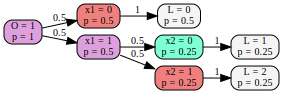

In [2]:
only_L = PTree.fromFunc(L_no_siblings)
what_if_L_was_1 = only_L.prop('L=1')
crit_L = only_L.critical(what_if_L_was_1)
show_L = only_L.show(show_prob=True, cut=what_if_L_was_1, crit=crit_L)
display(show_L)

## Intervention at $L=1$

I don’t see how to intervene on $L = 1$ without forcing us into the path where $x_1 = 1$ and $x_2 = 0$ here. (It seems like "$x_2 = 1$” and “$x_1 = 0$" are both in the false min-cut for the “$L = 1$” event.) 

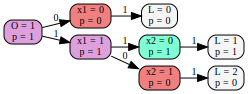

In [3]:
do_only_L = only_L.do(what_if_L_was_1)
show_do_only_L = do_only_L.show(show_prob=True, 
                                cut=what_if_L_was_1, 
                                crit=do_only_L.critical(what_if_L_was_1))
display(show_do_only_L)

# Alex's second model

But maybe the problem is that I need to draw “$L = 0$,” “$L = 1,$” and “$L = 2$” as siblings at every node where $L$ is being assigned? I don’t see anything in the probability tree definition that requires this, but if it’s the case, then I can see how their notion of “intervention” corresponds more closely to the usual one. Maybe the right way to think about probability trees as causal models is that the edges represent ‘possible mechanisms of intervention,’ and by failing to draw outgoing edges to the alternative “$L = *$” cases, I am encoding that intervention changing $L$ but not $x_i$ is impossible.

In [5]:
def L_with_siblings(bvar):
    if 'x1' not in bvar:
        return [(0.5, 'x1=0'),
                (0.5, 'x1=1')]
    if 'x2' not in bvar:
        if bvar['x1'] == '1':
            return [(0.5, 'x2=0'),
                    (0.5, 'x2=1')]
    if 'L' not in bvar:
        if bvar['x1'] == '0':
            return [(1, 'L=0'),
                    (0, 'L=1'),
                    (0, 'L=2')]
        if bvar['x2'] == '0':
            return [(0, 'L=0'),
                    (1,'L=1'),
                    (0, 'L=2' )]
        if bvar['x2'] == '1':
            return [(0, 'L=0'),
                    (0, 'L=1'),
                    (1, 'L=2')]
    return None


## Probability tree of second model

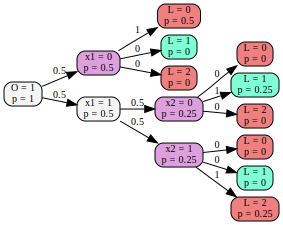

In [7]:
with_L = PTree.fromFunc(L_with_siblings)
what_if_L_was_1 = with_L.prop('L=1')
crit_L = with_L.critical(what_if_L_was_1)
show_L = with_L.show(show_prob=True, cut=what_if_L_was_1, crit=crit_L)
display(show_L)

## Intervention of $L=1$ on second model

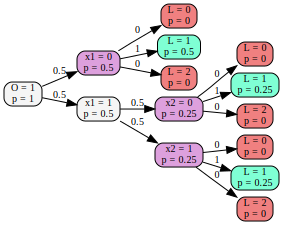

In [8]:
do_with_L = with_L.do(what_if_L_was_1)
show_do_with_L = do_with_L.show(show_prob=True, 
                                cut=what_if_L_was_1, 
                                crit=do_with_L.critical(what_if_L_was_1))
display(show_do_with_L)

# James Koppel's example 1

```julia
A = bernoulli(0.5)
B = bernoulli(0.5)
If (A) {
  Y = 1
  Z = 1
} else {
  Y = 0
  Z = 0
}

If (B && Y) {
  W = 1
} else {
  W = 0
}
```

In [9]:
def example_ptree_v1( bvar ):
    if 'A' not in bvar:
        return [(0.5, 'A=0'),
                (0.5, 'A=1')]
    if 'B' not in bvar:
        return [(0.5, 'B=0'),
                (0.5, 'B=1')]
    if ('Y' not in bvar) or ('Z' not in bvar):
        if bvar['A'] == '1':
            return [(1, 'Y=1,Z=1')]
        else:
            return [(1,'Y=0,Z=0')]
    if 'W' not in bvar:
        if (bvar['B'] == '1') and (bvar['Y'] == '1'):
            return [(1, 'W=1')]
        else:
            return [(1, 'W=0')]

In [10]:
def example_ptree_v2( bvar ):
    if 'A' not in bvar:
        return [(0.5, 'A=0'),
                (0.5, 'A=1')]
    if 'B' not in bvar:
        return [(0.5, 'B=0'),
                (0.5, 'B=1')]
    if ('Y' not in bvar) or ('Z' not in bvar):
        if bvar['A'] == '1':
            return [(0, 'Y=0,Z=0')
                    (0, 'Y=0,Z=1'),
                    (0, 'Y=1,Z=0'),
                    (1, 'Y=1,Z=1')]
        else:
            return [(1, 'Y=0,Z=0'),
                    (0, 'Y=0,Z=1'),
                    (0, 'Y=1,Z=0'),
                    (0, 'Y=1,Z=1')]
    if 'W' not in bvar:
        if (bvar['B'] == '1') and (bvar['Y'] == '1'):
            return [(0, 'W=0'),
                    (1, 'W=1'),]
        else:
            return [(1, 'W=0'),
                    (0, 'W=1')]
    return None

# Example involving conditioning and counterfactual on a graph with dynamic dependencies and interesting conditioning dependencies

```julia
X = bernoulli(0.8)

If (X) {
  Y = bernoulli(0.6)
  Z = Y XOR bernoulli(0.2)
} else {
  Z= bernoulli(0.8)
  Y =Z XOR bernoulli(0.4)
}

W = Y && Z && bernoulli(0.6)
```



In [13]:
def example_ptree_3( bvar ):
    if 'X' not in bvar:
        return [(0.2, 'X=0'),
                (0.8, 'X=1')]
    if 'Y' not in bvar:
        if bvar['X'] == '1':
            return [(0.4, 'Y=0'),
                    (0.6, 'Y=1')]
        if 'Z' not in bvar:
            return [(0.2, 'Z=0'),
                    (0.8, 'Z=1')]
        if bvar['Z'] == '0':
            return [(0.6,'Y=0'),
                    (0.4,'Y=1')]
        else:
            return [(0.4, 'Y=0'),
                    (0.6, 'Y=1')]
    if 'Z' not in bvar:
        if bvar['X'] == '1':
            if bvar['Y'] == '1':
                return [(0.8, 'Z=0'),
                        (0.2, 'Z=1')]
            else:
                return [(0.2, 'Z=0'),
                        (0.8, 'Z=1')]
        else:
            return [(0.2, 'Z=0'),
                    (0.8, 'Z=1')]
    if 'W' not in bvar:
        if (bvar['Y'] == '1') and (bvar['Z'] == '1'):
            return [(0.4, 'W=0'),
                    (0.6, 'W=1')]
        else:
            return [(1, 'W=0'),
                    (0, 'W=1')]
    return None
            
            

## Factual world Probability Tree mechanism for $Z=0$

In [45]:
example3_factual = PTree.fromFunc(example_ptree_3)
Z_is_0 = example3_factual.prop('Z=0')
show_example3_factual_Z_is_0 = example3_factual.show(show_prob=True,
                                              cut=Z_is_0, 
                                              crit=example3_factual.critical(Z_is_0) )
#show_example3_factual_Z_is_0

<IPython.core.display.Latex object>

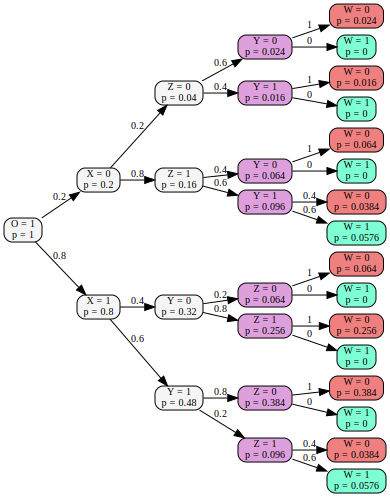

In [41]:
W = example3_factual.prop('W=1')
show_example3_factual_W = example3_factual.show(show_prob=True,
                                              cut=W, 
                                              crit=example3_factual.critical(W) )
display(Latex(f'$$P(W)={example3_factual.prob(W)}$$'))
show_example3_factual_W

## Conditioned on $Z=0$


In [44]:
see_Z_is_0 = example3_factual.see(Z_is_0)
show_see_z_is_0 = see_Z_is_0.show(show_prob=True, cut=Z_is_0, crit=see_Z_is_0.critical(Z_is_0))
#show_see_z_is_0

<IPython.core.display.Latex object>

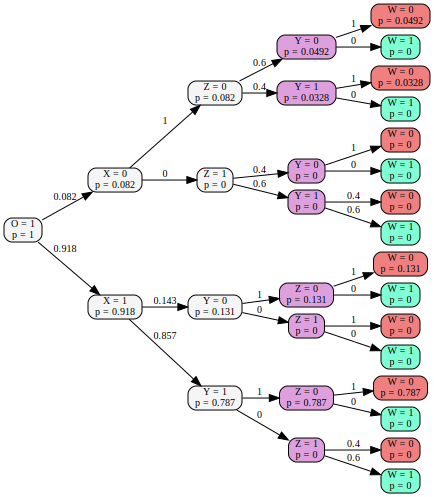

In [43]:
show_W_given_z_is_0 = see_Z_is_0.show(show_prob=True, cut=W, crit=see_Z_is_0.critical(W))
display(Latex('$$P(W|Z=0)='
             f'{see_Z_is_0.prob(W)}$$'))
show_W_given_z_is_0

## Intervene on $Z=1$



In [61]:
Z_is_1 = see_Z_is_0.prop('Z=1')
do_Z_is_1 = see_Z_is_0.do(Z_is_1)
show_do_Z_is_1 = do_Z_is_1.show(show_prob=True,
                                cut=Z_is_1,
                                crit=do_Z_is_1.critical(Z_is_1))
#show_do_Z_is_1

<IPython.core.display.Latex object>

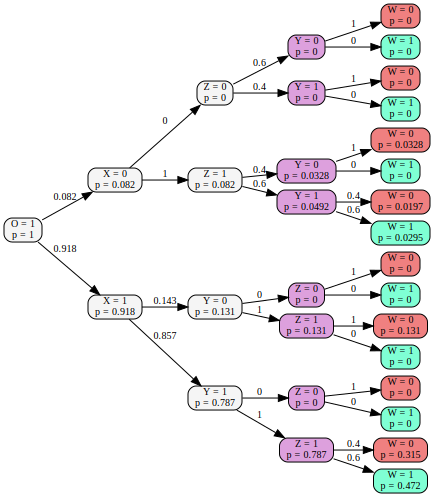

In [60]:
show_W_given_do_Z_is_1 = do_Z_is_1.show(show_prob=True,
                                               cut=W,
                                               crit=do_Z_is_1.critical(W))
display(Latex('$$P(W|Z=0,Z\leftarrow 1)='
             f'{do_Z_is_1.prob(W)}$$'))
show_W_given_do_Z_is_1

## Counterfactual

Note that the counterfactual value for $W_{Z\leftarrow 1}$ is the same as the factual value for $W$. This is not always necessarily the case as demonstrated in [section 2.7.1](https://nbviewer.jupyter.org/github/COVID-19-Causal-Reasoning/probability_trees/blob/main/Causal_Reasoning_in_Probability_Trees.ipynb?flush_cache=true#Computing-a-counterfactual) of the Causal Reasoning in Probability Trees tutorial.

In [58]:
counterfactual = example3_factual.cf(tree_prem=see_Z_is_0,
                                     cut_subj =Z_is_1)
show_counterfactual = counterfactual.show(show_prob=True, 
                                          cut=Z_is_1,
                                          crit=counterfactual.critical(Z_is_1))
#show_counterfactual

<IPython.core.display.Latex object>

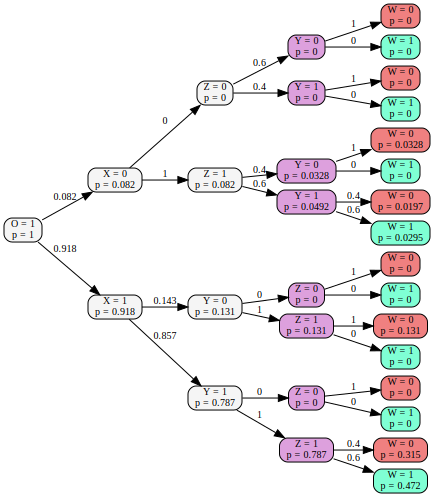

In [57]:
given_Z_is_0_show_W_in_a_world_where_Z_is_1 = counterfactual.show(show_prob=True,
                                                                  cut=W,
                                                                  crit=counterfactual.critical(W))
display(Latex('$$P(W_{Z\leftarrow 1}|Z=0)='
              f'{counterfactual.prob(W)}$$'))
given_Z_is_0_show_W_in_a_world_where_Z_is_1